In [1]:
import numpy as np
import matplotlib.pyplot as plt

1. Создайте двумерный массив 10x3, заполненный случайными значениями. В каждой строке выберите значение, наиболее близкое к 0.5.

In [2]:
a = np.random.random((10,3))
b = np.choose(np.argmin(np.abs(a-0.5),axis=1),a.T)
print(a)
print(b)

[[0.16250744 0.61891002 0.95642504]
 [0.45439842 0.64865299 0.89825347]
 [0.56425176 0.25667644 0.52436814]
 [0.72899318 0.68983678 0.08162291]
 [0.29068146 0.80919137 0.97175973]
 [0.97907633 0.56033393 0.58792233]
 [0.10494604 0.02725765 0.95795113]
 [0.29286381 0.61121864 0.23227739]
 [0.6963202  0.07860027 0.32135904]
 [0.64684904 0.44193704 0.58843822]]
[0.61891002 0.45439842 0.52436814 0.68983678 0.29068146 0.56033393
 0.10494604 0.61121864 0.32135904 0.44193704]


2. Создайте двумерный массив 6x6, заполненный случайными значениями. Затем сумму по каждой строке поделите на минимальный элемент из столбца с тем же индексом.

In [3]:
a=np.random.random((6,6))
b=np.sum(a,axis=1)/np.min(a,axis=0)
print(a)
print(b)

[[0.53059227 0.9227625  0.1794075  0.97617813 0.31864917 0.39488802]
 [0.05187747 0.49994441 0.85898932 0.99252099 0.03841017 0.12277382]
 [0.98773355 0.105836   0.48654409 0.93790146 0.18179471 0.34127229]
 [0.11176695 0.29982979 0.42326497 0.26317836 0.68912775 0.83984603]
 [0.13622127 0.30216836 0.7475862  0.00126965 0.61609533 0.38183291]
 [0.6191095  0.44714258 0.44164308 0.76598553 0.62724733 0.34532796]]
[  64.0447119    24.23103834   16.95069652 2069.07925332   56.89049716
   26.44257593]


3. На примере массива x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) найдите максимальный элемент в массиве среди элементов, перед которыми стоит ноль.

In [4]:
x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])
mask = (x == 0)
mask = np.roll(mask,1)
mask[0] = 0
print(np.max(x[mask]))

5


4. Пусть заданы два массива x = np.ones(10) и i = np.array([0, 1, 2, 3, 5, 5, 5, 8]). Прибавьте единицу к тем элементам массива x, индексы которых указаны в массиве i. В случае, если некоторый индекс встретился в массиве i несколько раз, прибавьте к соответствующему элементу массива x число вхождений данного индекса в массив i.

In [5]:
x = np.ones(10)
i = np.array([0, 1, 2, 3, 5, 5, 5, 8])
np.add.at(x,i,1)
print(x)

[2. 2. 2. 2. 1. 4. 1. 1. 2. 1.]


5. Написать функцию, реализующую алгоритм k-means. Входные и выходные значения функции должны быть аналогичны https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.cluster.vq.kmeans.html. Функция должна содержать не более двух циклов while (for).

In [6]:
from scipy.spatial.distance import cdist
from sklearn.metrics import pairwise_distances_argmin
def kmeans(obs, k, iter=40, thresh=1e-05):
    std=np.std(obs, axis=0)
    obs/=std
    cent=obs[np.random.choice(np.arange(obs.shape[0]),k,replace=False)]
    ncent=np.empty(cent.shape)
    for i in range(k):
        clust=pairwise_distances_argmin(obs,cent)
        for j in range(k):
            ncent[j]=obs[clust==j].mean(axis=0)
        if (np.linalg.norm(np.max(ncent-cent))<thresh):
            break;
        cent=ncent
    dist=cdist(obs,cent).min(axis=1).sum()/k
    obs*=std
    return clust,dist

6. С помощью реализованной функции kmeans выделить кластеры клиентов в разрезах возраст-доход, возрвст-покупательский индекс, доход-покупательский индекс. В каждом случае использовать elbow method для определения оптимального числа кластеров. Визуализировать полученные кластеры (каждый кластер изобразить собственным цветом). Дать интерпретацию полученным кластерам.

In [7]:
url = 'https://raw.githubusercontent.com/sharmaroshan/Clustering-of-Mall-Customers/master/Mall_Customers.csv'
data = np.loadtxt(url, delimiter=',', dtype=object, skiprows=1)
data[:, 1] = data[:, 1] == 'Male'
data = data.astype(float)
dists=np.empty(9)

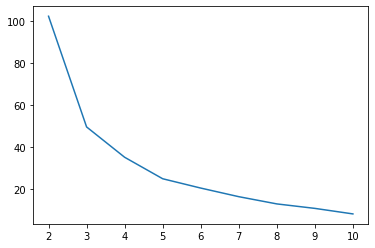

In [8]:
obs=np.array([data[:, 2],data[:, 3]]).T
for i in range(9):
    clust,dists[i]=kmeans(obs, i+2)
plt.plot(np.arange(9)+2,dists)
plt.show()

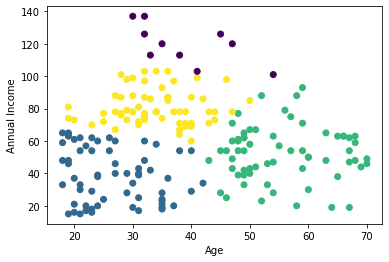

In [9]:
clust, dist = kmeans(obs, 4)
plt.scatter(obs[:, 0], obs[:, 1], c=clust);
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.show()

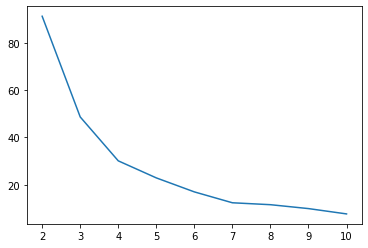

In [10]:
obs=np.array([data[:, 2],data[:, 4]]).T
for i in range(9):
    clust,dists[i]=kmeans(obs, i+2)
plt.plot(np.arange(9)+2,dists)
plt.show()

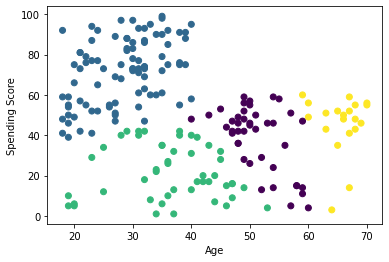

In [11]:
clust, dist = kmeans(obs, 4)
plt.scatter(obs[:, 0], obs[:, 1], c=clust);
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.show()

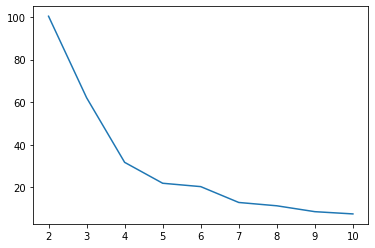

In [12]:
obs=np.array([data[:, 3],data[:, 4]]).T
for i in range(9):
    clust,dists[i]=kmeans(obs, i+2)
plt.plot(np.arange(9)+2,dists)
plt.show()

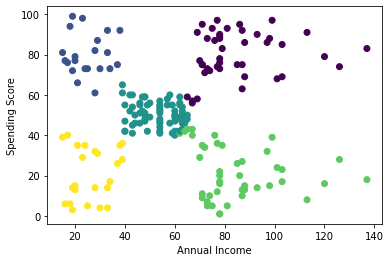

In [13]:
clust, dist = kmeans(obs, 5)
plt.scatter(obs[:, 0], obs[:, 1], c=clust);
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()